# Load Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
df = pd.read_csv('data/kc_house_data.csv', index_col=0)

# check the columns and first few rows
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Explore the Data

In [4]:
# get the total counts and data types for each column
print(df.shape)
print("\n")
df.info()

(21597, 20)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 n

In [5]:
# Get descriptions of each column
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# look for duplicates
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicates: ", len(duplicate_rows_df))

Number of duplicates:  0


In [7]:
# preview 5 most frequent values of a col in a loop, for each string col.
# looking for extraneous values and getting to know the data
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
    print('\n')

date 6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: int64


floors 1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, d

In [8]:
# replace extraneous value '?' in 'sqft_basement' col to equal 0 as that is mode
# convert to type to float
df.sqft_basement = df.sqft_basement.map(lambda x: '0' if x == '?' else x)
df.sqft_basement = df.sqft_basement.astype('float')

In [9]:
# see results
df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [10]:
# check for null values
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Scrub the Data

In [11]:
# analyze waterfront column
print(df['waterfront'].value_counts())

0.0    19075
1.0      146
Name: waterfront, dtype: int64


In [12]:
# values are either yes (1.0) or no (0.0)
# mean, median, or mode would not be ideal measurements here
# it is best to drop the rows
df = df[df['waterfront'].notna()]
print(df.isnull().sum())

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               57
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3412
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [13]:
# how much is missing from year renovated - 18%
# printed most common values so that we know what to replace the nulls with
print('Percentage of Null yr_renovated Values:', len(df[df.yr_renovated.isna()])/ len(df))
print('Number of Unique yr_renovated Values:', df.yr_renovated.nunique())
print('Number of Unique Values:', df.yr_renovated.value_counts())

Percentage of Null yr_renovated Values: 0.17751417720201862
Number of Unique yr_renovated Values: 70
Number of Unique Values: 0.0       15157
2014.0       64
2013.0       29
2005.0       27
2000.0       25
          ...  
1953.0        1
1950.0        1
1954.0        1
1959.0        1
1971.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [14]:
# 0.0 is the mode
# a number equals the year the home was renovated and 0.0 means the home was never renovated
# we should then also assume that the blank cells mean that these homes were never renovated
# convert nan to 0.0
df.loc[df.yr_renovated.isna(), 'yr_renovated'] = 0.0

In [15]:
# see results
df.yr_renovated.value_counts()

0.0       18569
2014.0       64
2013.0       29
2005.0       27
2000.0       25
          ...  
1953.0        1
1950.0        1
1954.0        1
1959.0        1
1971.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [16]:
# analyze view column
print(df['view'].value_counts())

0.0    17312
2.0      836
3.0      435
1.0      291
4.0      290
Name: view, dtype: int64


In [17]:
views_mean = df['view'].mean()
views_median = df['view'].median()
views_mode = df['view'].mode()
print('Viewed Mean: ', views_mean)
print('Viewed Median: ', views_median)
print('Viewed Mode: ', views_mode)

Viewed Mean:  0.23105823418910457
Viewed Median:  0.0
Viewed Mode:  0    0.0
dtype: float64


In [18]:
# both the median and mode are 0.0
# the mean rounded to the nearest whole number is also 0.0
# it is best to assume the cells were left blank because they were not viewed
# the blank num_views cells should be changed to 0.0
df['view'] = df['view'].fillna(0.0)
print(df['view'].value_counts())

0.0    17369
2.0      836
3.0      435
1.0      291
4.0      290
Name: view, dtype: int64


In [19]:
print(df.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [20]:
# see if all null values are filled
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 6414100192 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           19221 non-null  object 
 1   price          19221 non-null  float64
 2   bedrooms       19221 non-null  int64  
 3   bathrooms      19221 non-null  float64
 4   sqft_living    19221 non-null  int64  
 5   sqft_lot       19221 non-null  int64  
 6   floors         19221 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           19221 non-null  float64
 9   condition      19221 non-null  int64  
 10  grade          19221 non-null  int64  
 11  sqft_above     19221 non-null  int64  
 12  sqft_basement  19221 non-null  float64
 13  yr_built       19221 non-null  int64  
 14  yr_renovated   19221 non-null  float64
 15  zipcode        19221 non-null  int64  
 16  lat            19221 non-null  float64
 17  long           19221 non-null  float

In [21]:
# Converting date to datetime
df.date = pd.to_datetime(df.date)

# EDA with Visualizations

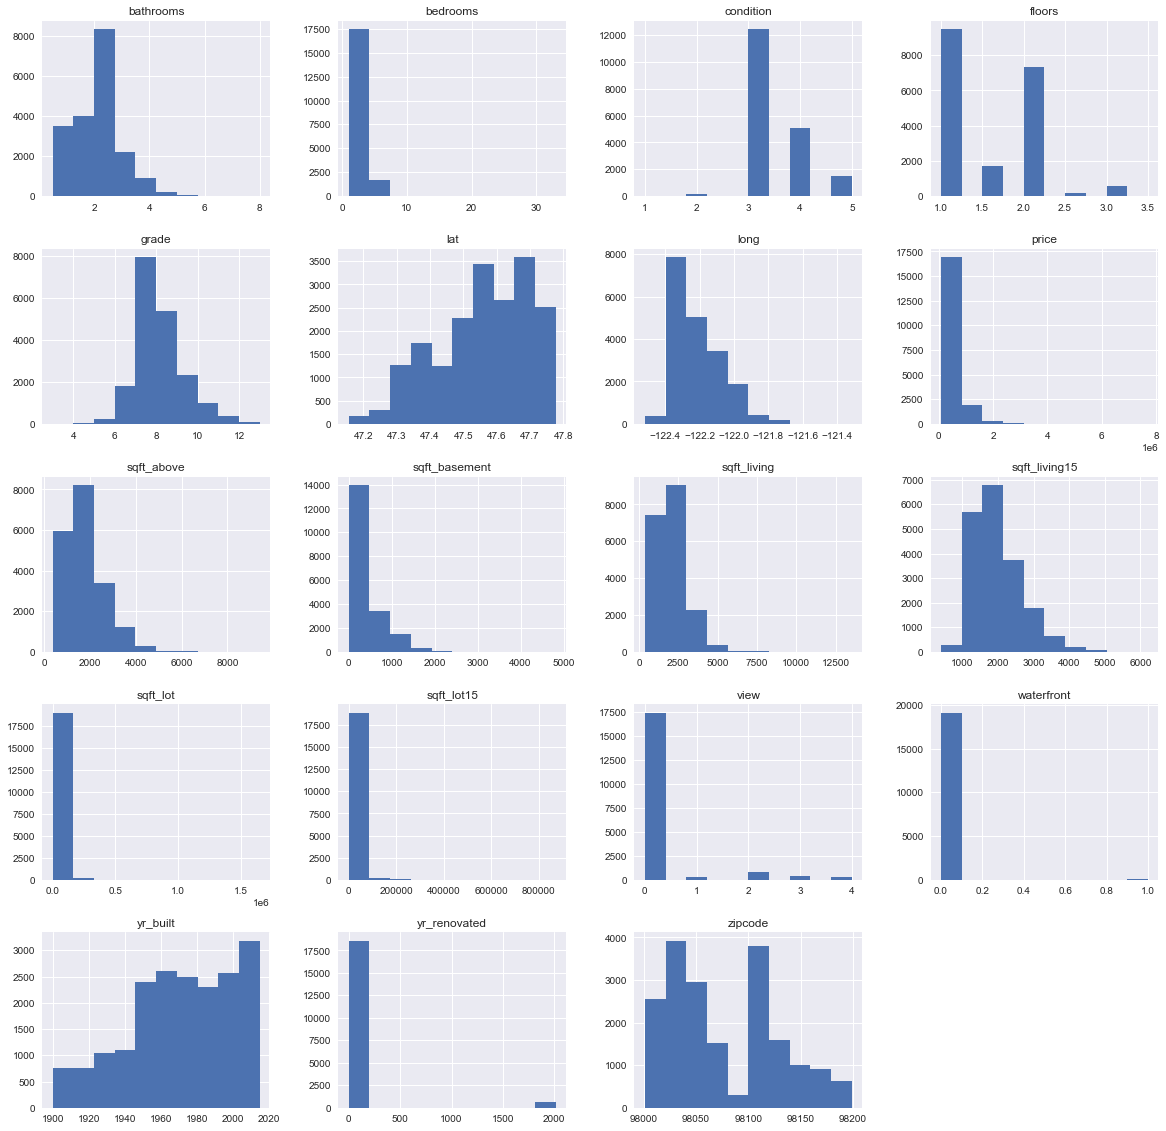

In [22]:
df.hist(figsize=(20,20));

In [23]:
# from the skews, we can see there are distributions that appear to be linear, with some outliers
# they are grade, num_bathrooms, num_bedrooms, sqft_above_ground, sqft_home, sqft_home_15neighbors, lat, and long
# there are also non-linear distributions that are categorical data, which we will keep for now

## Independent Variable - Price

In [24]:
# our independant variable will be price
# the first thing we need to do is get rid of the ouliers
# import libraries to get statistics
from numpy import mean
from numpy import std

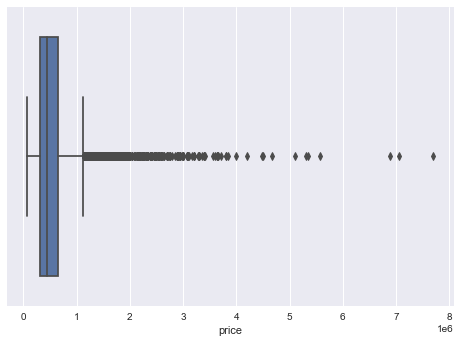

In [30]:
sns.boxplot(x=df['price'])

In [31]:
# calculate summary statistics
data_mean, data_std = mean(df.price), std(df.price)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [32]:
# identify outliers
outliers = [x for x in df.price if x < lower or x > upper]

In [33]:
sorted(outliers)

[1660000.0,
 1660000.0,
 1660000.0,
 1670000.0,
 1670000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1690000.0,
 1690000.0,
 1690000.0,
 1690000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1720000.0,
 1720000.0,
 1720000.0,
 1730000.0,
 1730000.0,
 1730000.0,
 1730000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1750000.0,
 1750000.0,
 1750000.0,
 1750000.0,
 1750000.0,
 1750000.0,
 1750000.0,
 1750000.0,
 1760000.0,
 1760000.0,
 1760000.0,
 1760000.0,
 1770000.0,
 1770000.0,
 1770000.0,
 1780000.0,
 1780000.0,
 1780000.0,
 1780000.0,
 1780000.0,
 1790000.0,
 1790000.0,
 1800000.0,
 1800000.0,
 1800000.0,
 1800000.0,
 1800000.0,
 180

In [34]:
#subset price to eliminate outliers 
df = df[df.price < 1660000]

In [35]:
# .round() takes it out of scientific notation
df['price'].describe().round()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18870 entries, 6414100192 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           18870 non-null  datetime64[ns]
 1   price          18870 non-null  float64       
 2   bedrooms       18870 non-null  int64         
 3   bathrooms      18870 non-null  float64       
 4   sqft_living    18870 non-null  int64         
 5   sqft_lot       18870 non-null  int64         
 6   floors         18870 non-null  float64       
 7   waterfront     18870 non-null  float64       
 8   view           18870 non-null  float64       
 9   condition      18870 non-null  int64         
 10  grade          18870 non-null  int64         
 11  sqft_above     18870 non-null  int64         
 12  sqft_basement  18870 non-null  float64       
 13  yr_built       18870 non-null  int64         
 14  yr_renovated   18870 non-null  float64       
 15  zipco

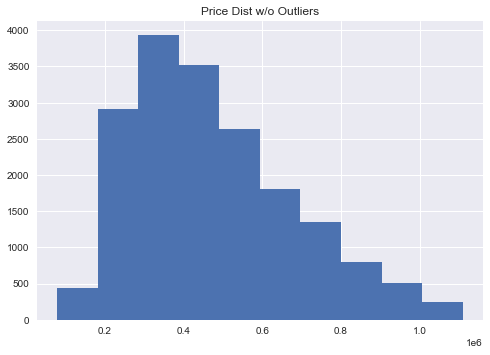

In [36]:
plt.title('Price Dist w/o Outliers')
df[df['price']<cut_off]['price'].hist()

## Housing Aspects

### Grade

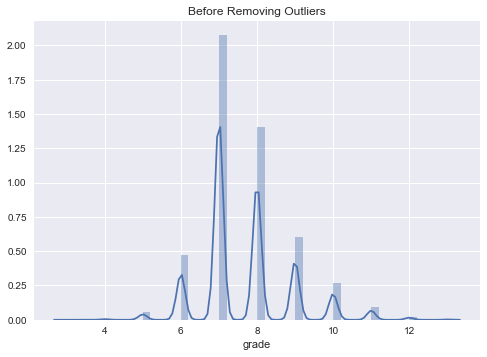

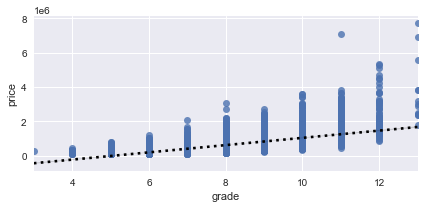

In [80]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['grade'])
plt.show();
sns.lmplot(x = 'grade', y = 'price', data=df,
           height=3, aspect= 2,
           line_kws={'color':'black', 'linestyle':':'})
plt.show();

### Number of Bathrooms

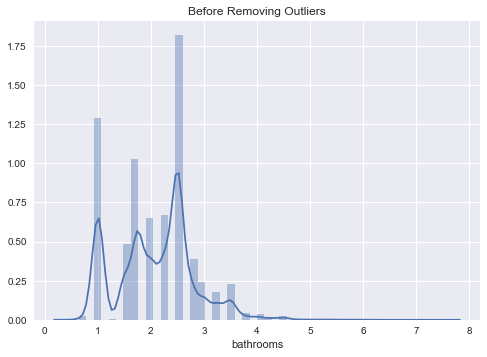

In [37]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['bathrooms'])
plt.show();

In [39]:
bathrooms_cutoff = df['bathrooms'].quantile(.99)
bathrooms_cutoff

4.0

In [41]:
(df[df['bathrooms']>bathrooms_cutoff]['bathrooms']
 .describe())

count    149.000000
mean       4.582215
std        0.469008
min        4.250000
25%        4.250000
50%        4.500000
75%        4.500000
max        7.500000
Name: bathrooms, dtype: float64

### Number of Bedrooms

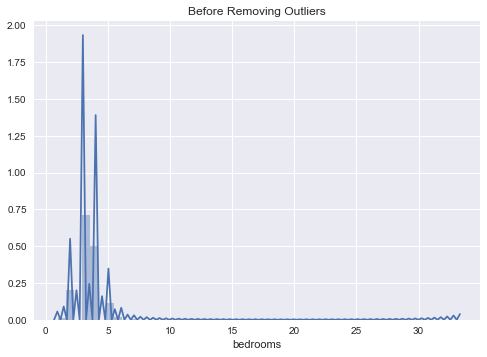

In [82]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['bedrooms'])
plt.show();

### Square Feet Above Ground

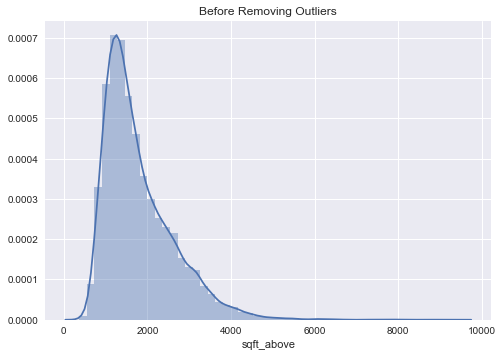

In [84]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['sqft_above'])
plt.show();

### Square Feet of Home

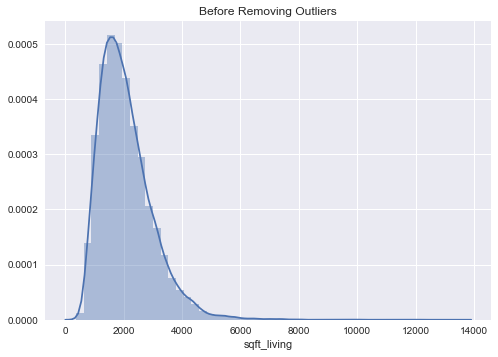

In [86]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['sqft_living'])
plt.show();

### Square Feet of Neighbor's Homes

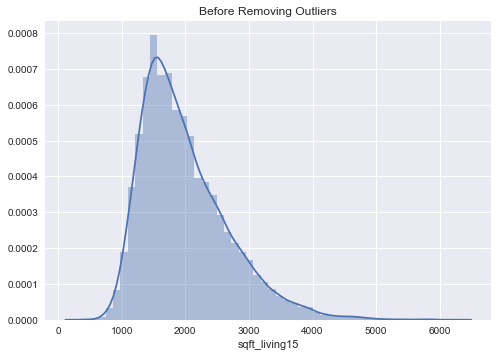

In [87]:
# Identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['sqft_living15'])
plt.show();

### Latitude

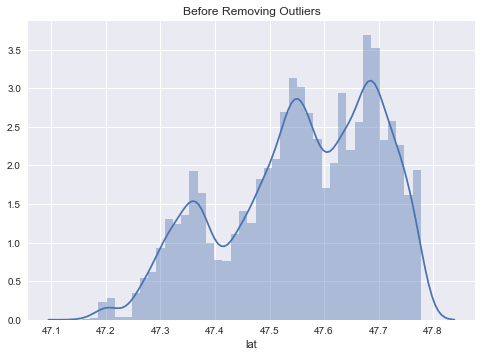

In [88]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['lat'])
plt.show();

### Longitude

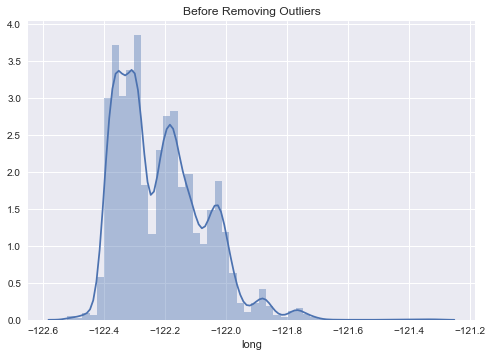

In [89]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['long'])
plt.show();

## Date of Sale

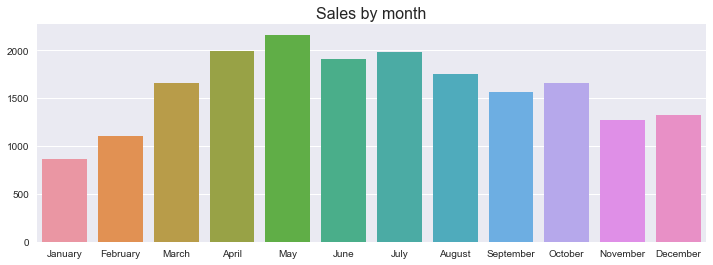

In [20]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_sales = []

for i in range(1,13):
    monthly_sales.append(sum(df.date.dt.month == i))
    
plt.figure(figsize=(12,4))
sns.barplot(months, monthly_sales)
plt.title('Sales by month', fontdict={'fontsize': 16})
plt.show()

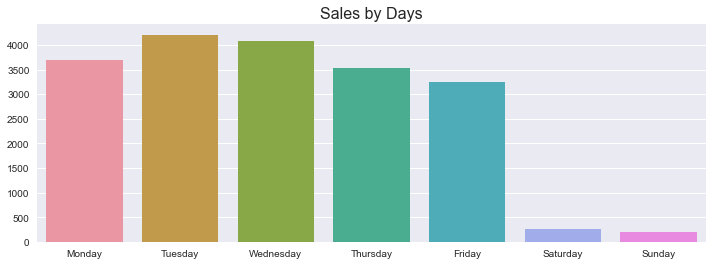

In [21]:
day_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_sales = []

for i in range(0,7):
    daily_sales.append(sum(df.date.dt.dayofweek == i))

plt.figure(figsize=(12,4))
sns.barplot(day_of_week,daily_sales)
plt.title('Sales by Days', fontdict={'fontsize': 16})
plt.show()

## Group by Class

In [22]:
# upper class = 1
# middle class = 2
# lower class = 3

df.loc[df['price'] > 750000, 'class_scale'] = 1
df.loc[(df['price'] < 750000) & (df['price'] > 350000), 'class_scale'] = 2
df.loc[df['price'] < 350000, 'class_scale'] = 3

In [23]:
grouped = df.groupby(['class_scale'])['price', 'grade'].agg(['mean','min', 'max', 'std']).round()
grouped.head()

<ipython-input-23-2c9d313e0316>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = df.groupby(['class_scale'])['price', 'grade'].agg(['mean','min', 'max', 'std']).round()


price                                grade             
                  mean       min        max       std  mean min max  std
class_scale                                                             
1.0          1140445.0  750500.0  7700000.0  539338.0   9.0   5  13  1.0
2.0           513194.0  350500.0   749999.0  107749.0   8.0   4  11  1.0
3.0           267266.0   78000.0   349990.0   54144.0   7.0   3  10  1.0

In [24]:
# upper class = 17%
# middle class = 52% 
# lower class = 31%
df.class_scale.value_counts()

2.0    9919
3.0    5888
1.0    3189
Name: class_scale, dtype: int64

## Location

In [25]:
%pip install uszipcode

Note: you may need to restart the kernel to use updated packages.


In [26]:
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True) # set simple_zipcode=False to use rich info database
zipcode = search.by_zipcode("10001")
zipcode

SimpleZipcode(zipcode='10001', zipcode_type='Standard', major_city='New York', post_office_city='New York, NY', common_city_list=['New York'], county='New York County', state='NY', lat=40.75, lng=-73.99, timezone='Eastern', radius_in_miles=0.9090909090909091, area_code_list=['718', '917', '347', '646'], population=21102, population_density=33959.0, land_area_in_sqmi=0.62, water_area_in_sqmi=0.0, housing_units=12476, occupied_housing_units=11031, median_home_value=650200, median_household_income=81671, bounds_west=-74.008621, bounds_east=-73.984076, bounds_north=40.759731, bounds_south=40.743451)

In [27]:
df.zipcode.nunique()

70

In [28]:
zipcode.to_dict()

{'zipcode': '10001',
 'zipcode_type': 'Standard',
 'major_city': 'New York',
 'post_office_city': 'New York, NY',
 'common_city_list': ['New York'],
 'county': 'New York County',
 'state': 'NY',
 'lat': 40.75,
 'lng': -73.99,
 'timezone': 'Eastern',
 'radius_in_miles': 0.9090909090909091,
 'area_code_list': ['718', '917', '347', '646'],
 'population': 21102,
 'population_density': 33959.0,
 'land_area_in_sqmi': 0.62,
 'water_area_in_sqmi': 0.0,
 'housing_units': 12476,
 'occupied_housing_units': 11031,
 'median_home_value': 650200,
 'median_household_income': 81671,
 'bounds_west': -74.008621,
 'bounds_east': -73.984076,
 'bounds_north': 40.759731,
 'bounds_south': 40.743451}

In [29]:
res = search.by_population(lower=0, upper=999999999,
sort_by=zipcode.population, ascending=False, returns=10)
for zipcode in res:
    print(zipcode)

AttributeError: 'int' object has no attribute 'name'

In [30]:
zcode = pd.DataFrame(df['zipcode'])
print (zcode)

            zipcode
id                 
6414100192    98125
5631500400    98028
2487200875    98136
1954400510    98074
7237550310    98053
...             ...
2997800021    98116
263000018     98103
6600060120    98146
1523300141    98144
1523300157    98144

[19221 rows x 1 columns]


In [31]:
# from osgeo import gdal, ogr, osr
# from fiona.ogrext import Iterator, ItemsIterator, KeysIterator
from geopandas import GeoDataFrame
gdal.VersionInfo()

ModuleNotFoundError: No module named 'geopandas'

In [32]:
def zco(x):
    if pd.isnull(x):
        return None
    else:
        city = search.by_zipcode(int(x))['City']
        return city if city else x

zcode['City'] = zcode['zipcode'].apply(zco)
print (zcode)

TypeError: 'SimpleZipcode' object is not subscriptable

In [33]:
def zco(x):
    if pd.isnull(x):
        return None
    else:
        city = search.by_zipcode(int(x))['City']
        return city if city else x

zcode['City'] = zcode['zipcode'].apply(zco)
print (zcode)

TypeError: 'SimpleZipcode' object is not subscriptable

In [ ]:
df.cut(['price'], 3, )

In [ ]:
pd.plotting.scatter_matrix()

In [ ]:
# create histograms for all numeric columns to get idea of distributions
df.hist(figsize = (20,18));

# Homoscedasticity

Check Linearity for each column. Does col[x] have a linear relationship with price?

In [ ]:
# use jointplot to check for linearity 
sns.jointplot('bathrooms','price', data=df, kind='reg');

In [ ]:
sns.jointplot('bedrooms','price', data=df, kind='reg');

In [ ]:
sns.jointplot('condition','price', data=df, kind='reg');

In [ ]:
sns.jointplot('floors','price', data=df, kind='reg');

In [ ]:
sns.jointplot('grade','price', data=df, kind='reg');

In [ ]:
sns.jointplot('sqft_above','price', data=df, kind='reg');

In [ ]:
sns.jointplot('sqft_basement','price', data=df, kind='reg');

In [ ]:
sns.jointplot('yr_built','price', data=df, kind='reg');

In [ ]:
sns.jointplot('yr_renovated','price', data=df, kind='reg');

In [ ]:
sns.jointplot('sqft_living15','price', data=df, kind='reg');

In [ ]:
sns.jointplot('sqft_lot15','price', data=df, kind='reg');

# Multicolinearity: 'bathrooms','bedrooms', 'grade' ,'sqft_above', 'sqft_living15','sqft_lot15' have strong linear relationships to price

floors and condition have little to no linear relationship to price

In [ ]:
# checking for multicolinearity across those that had highest linear correlation
# keep grade, bedrooms, bathrooms
# grade, sqft_living15, and sqft_above all have too high multicolinearity (above 65%) so only need one
feats = ['bathrooms','bedrooms', 'grade' ,'sqft_above', 'sqft_living15','sqft_lot15']
corr = df[feats].corr()
corr

In [ ]:
sns.heatmap(corr, center=0, annot=True);